<a href="https://colab.research.google.com/github/guidomoor/FEA-ML/blob/main/NN_for_Ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ke prediction**

the dataframe is extracted from single element simulations where multiple nodes are being displaced. The element is a 2D plain stress element fully integrated:

4--------3

1--------2

U is a 8x1 array = [u11, u12, u21, u22, ..., u44]
K is a 36x1 array = [K11, K12, ..., K36]

In [143]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
 #Create a model that inherits nn.Module
 class Model(nn.Module):
  #Input Layer (4 features of flower) -->
  #Hidden Layer 1 (#of neurons) -->
  #H2 --> Output
  #(3 classes of flowers)
  def __init__(self, in_features=8, h1=64, h2=64, h3=36, out_features=36):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  #this function is pushing the information forward through the layers
  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectify linear unit function relu
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

In [145]:
torch.manual_seed(42)
model = Model()

In [146]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')
    my_df = pd.read_csv(filename, header=None)  # Read the CSV file into a DataFrame


Saving Final_NN_for_Ke.csv to Final_NN_for_Ke (7).csv
Uploaded file: Final_NN_for_Ke (7).csv


In [147]:
my_df


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.25,-0.5,0.25,-0.25,0.25,0.50,-0.25,-0.25,62264.898563,26270.604396,...,-1648.351648,43934.911243,-1648.351648,-32333.051564,12637.362637,-11411.665258,-4120.879121,-190.194421,-6868.131868,43934.911243
1,0.25,-0.5,0.25,-0.25,0.25,0.50,-0.25,-0.50,58670.700683,20649.586145,...,-3089.324974,62094.435657,2783.594956,-28759.331076,13598.011521,-14965.327825,-5561.852447,-3513.546724,-10819.754031,47238.205625
2,0.25,-0.5,0.25,-0.25,0.25,0.50,-0.50,-0.25,75187.016619,29173.052974,...,-1139.271687,38390.850456,-3654.906737,-21128.397419,12297.975997,-7283.285734,-3611.799160,-6382.763706,-5031.270100,34794.446860
3,0.25,-0.5,0.25,-0.25,0.25,0.50,-0.50,-0.50,68536.956535,24318.071927,...,-2228.968061,54513.294712,-58.228020,-18214.505895,13024.440246,-11064.395304,-4701.495533,-9364.945505,-8264.716692,38643.846704
4,0.25,-0.5,0.25,-0.25,0.50,0.25,-0.25,-0.25,31505.311394,14881.879802,...,-5128.995125,52752.186475,7335.831226,-22441.431922,14957.791622,-15788.401568,-7601.522598,-2278.936110,-14692.100250,40508.769600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,0.30,-1.0,0.30,-0.70,1.00,0.50,-0.45,-0.84,31967.745527,11135.861179,...,-4451.324950,71903.503844,9134.504205,-20444.455186,16737.705583,-22118.112170,-6923.852422,-3092.608026,-18948.357366,45655.175381
4029,0.30,-1.0,0.30,-0.70,1.00,0.50,-0.45,-0.84,31967.745527,11135.861179,...,-4451.324950,71903.503844,9134.504205,-20444.455186,16737.705583,-22118.112170,-6923.852422,-3092.608026,-18948.357366,45655.175381
4030,0.30,-1.0,0.30,-0.70,1.00,0.50,-0.45,-0.84,31967.745527,11135.861179,...,-4451.324950,71903.503844,9134.504205,-20444.455186,16737.705583,-22118.112170,-6923.852422,-3092.608026,-18948.357366,45655.175381
4031,0.30,-1.0,0.30,-0.70,1.00,0.50,-0.45,-0.84,31967.745527,11135.861179,...,-4451.324950,71903.503844,9134.504205,-20444.455186,16737.705583,-22118.112170,-6923.852422,-3092.608026,-18948.357366,45655.175381


In [148]:
# Assuming my_df has 44 columns
X = my_df.iloc[:, :8]  # Select the first 8 columns (Coord): input
y = my_df.iloc[:, 8:]   # Select the last 36 columns (Ke): output
#convert to numpy arrays
#Data used in the NN
X = X.values
y = y.values

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
#Train Test Slip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [151]:
# Convert your datasets to PyTorch tensors
X_train = torch.FloatTensor(X_train)  # Inputs should be Float
X_test = torch.FloatTensor(X_test)    # Inputs should be Float

# If y_train and y_test are initially NumPy arrays
y_train = np.array(y_train, dtype=float)  # Ensure they are float arrays
y_test = np.array(y_test, dtype=float)    # Ensure they are float arrays

# Convert to PyTorch FloatTensor
y_train = torch.FloatTensor(y_train)  # Convert to FloatTensor
y_test = torch.FloatTensor(y_test)    # Convert to FloatTensor



**Normalized Dataset**

In [152]:
# Min-Max Normalization for Inputs
X_train_min = X_train.min(dim=0, keepdim=True).values  # Min of each feature in training set
X_train_max = X_train.max(dim=0, keepdim=True).values  # Max of each feature in training set

X_train_normalized = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test_normalized = (X_test - X_train_min) / (X_train_max - X_train_min)  # Apply training stats to test

# Or, Standardization (Z-score normalization) for Inputs
X_train_mean = X_train.mean(dim=0, keepdim=True)
X_train_std = X_train.std(dim=0, keepdim=True)

X_train_standardized = (X_train - X_train_mean) / X_train_std
X_test_standardized = (X_test - X_train_mean) / X_train_std  # Apply training stats to test

# Min-Max Normalization for Labels
y_train_min = y_train.min()
y_train_max = y_train.max()

y_train_normalized = (y_train - y_train_min) / (y_train_max - y_train_min)
y_test_normalized = (y_test - y_train_min) / (y_train_max - y_train_min)  # Apply training stats to test

# Or, Standardization (Z-score normalization) for Labels
y_train_mean = y_train.mean()
y_train_std = y_train.std()

y_train_standardized = (y_train - y_train_mean) / y_train_std
y_test_standardized = (y_test - y_train_mean) / y_train_std  # Apply training

# Example: Using Min-Max normalized inputs and labels
X_train = X_train_normalized
X_test = X_test_normalized
y_train = y_train_normalized
y_test = y_test_normalized

In [153]:
#Mean and Variance:
Mean = X_train_mean
Var = X_train_std
print(Mean)
print(Var)

tensor([[ 0.5797, -0.5994,  0.5797, -0.5949,  0.6126,  0.5884, -0.5707, -0.6113]])
tensor([[0.3175, 0.3322, 0.3175, 0.3080, 0.3226, 0.3060, 0.3113, 0.3101]])


In [154]:
#Set the criterion of model to measure the error
criterion = nn.MSELoss()  # Use MSE loss for regression
#Choose an Optimizer - Adam Optimizer, learning rate (lr).
#learning rate is used in case the error does not go down
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [155]:
#Train the model:
#Epochs: (one run through all the training data in the network)
epochs = 1000
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train)

  #Measure the loss/error
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  #Keep Track of losses
  losses.append(loss.detach().numpy())

  #Print the losses
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  #Do back propagation: take error of forward propagation and feed it backwords to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.09130657464265823
Epoch: 10 Loss: 0.06735768169164658
Epoch: 20 Loss: 0.03948234021663666
Epoch: 30 Loss: 0.019281547516584396
Epoch: 40 Loss: 0.007155183237046003
Epoch: 50 Loss: 0.0022959536872804165
Epoch: 60 Loss: 0.0007254758384078741
Epoch: 70 Loss: 0.0003445998299866915
Epoch: 80 Loss: 0.000296665879432112
Epoch: 90 Loss: 0.00023948083980940282
Epoch: 100 Loss: 0.00019428000086918473
Epoch: 110 Loss: 0.00017279788153246045
Epoch: 120 Loss: 0.0001560564269311726
Epoch: 130 Loss: 0.00014284960343502462
Epoch: 140 Loss: 0.00013299773854669183
Epoch: 150 Loss: 0.00012578758469317108
Epoch: 160 Loss: 0.00012028597120661288
Epoch: 170 Loss: 0.000115322953206487
Epoch: 180 Loss: 0.00010806520003825426
Epoch: 190 Loss: 0.00010028993710875511
Epoch: 200 Loss: 9.212628356181085e-05
Epoch: 210 Loss: 8.48543641041033e-05
Epoch: 220 Loss: 7.912681030575186e-05
Epoch: 230 Loss: 7.484171510441229e-05
Epoch: 240 Loss: 7.14707639417611e-05
Epoch: 250 Loss: 6.84929545968771e-05
E

Text(0.5, 0, 'Epoch')

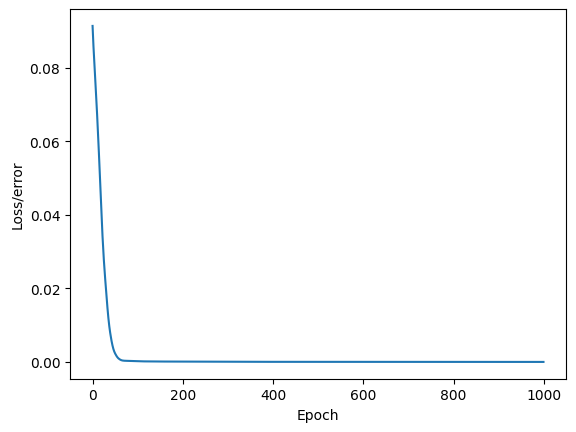

In [156]:
#Plot Loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [157]:
#Evaluate Model on Test Data Set
with torch.no_grad(): #turns off backpropagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss

tensor(2.4162e-05)

In [158]:
# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Get predictions
    y_preds = model(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = torch.mean(torch.abs(y_preds - y_test))
    print(f'MAE: {mae.item():.4f}')

    # Calculate Mean Squared Error (MSE)
    mse = torch.mean((y_preds - y_test) ** 2)
    print(f'MSE: {mse.item():.4f}')

    # Calculate R-squared
    ss_total = torch.sum((y_test - torch.mean(y_test)) ** 2)
    ss_residual = torch.sum((y_test - y_preds) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f'R-squared: {r_squared.item():.4f}')


MAE: 0.0022
MSE: 0.0000
R-squared: 0.9835


In [159]:
#new random input
new_test = torch.tensor([[0.25,	0.2,	0.2,	0.2,	0.250000000000000,	0.25,	0.2,	0.2]])
#Feed into the NN, like the X_test
#with torch.no_grad():
#  print(model(new_test))


# Feed the input data into the model (without gradient tracking)
with torch.no_grad():
    prediction_normalized = model(new_test)

# Denormalize the prediction to get the real values (back to the original scale)
prediction_real = prediction_normalized * (y_train_max - y_train_min) + y_train_min

# Print the real output (denormalized)
print(prediction_real)

tensor([[ 40558.1406,  15399.6250,  45025.3750, -22985.9375,    495.9375,
          42776.9375,    416.7969,   7621.9688, -16738.5156,  45830.1406,
         -17225.7344, -15724.9844,   7901.7031,   2707.5938,  35480.9219,
         -14481.2812, -17228.5312,    276.9531, -25037.6562,  12147.1562,
          36165.2031,   2776.6875,  -1512.3281, -22123.0781,  16522.5938,
         -23717.4844,   -363.9844,  43668.4062,   -728.7031, -26835.5938,
          15986.4531, -22632.6875,   -668.2812,   2832.8750, -16602.6094,
          40367.6875]])


In [160]:
# Extracting all weights and biases
for name, param in model.named_parameters():
    if param.requires_grad:  # Only if you want trainable parameters
        print(f'Layer: {name}, Weights: {param.data.numpy()}')


Layer: fc1.weight, Weights: [[ 0.25161088  0.28385282 -0.10152226  0.31779453 -0.09223342  0.06259073
  -0.17671143  0.19998108]
 [ 0.32936093 -0.21838292  0.3249957   0.11618964  0.29723254  0.08484596
   0.21374375  0.00985615]
 [ 0.27586514  0.05068088 -0.16173682  0.10218589 -0.14851151 -0.04666248
  -0.13956097  0.24295071]
 [-0.2790845  -0.16299176 -0.09983455 -0.21258192  0.03336947 -0.3491973
   0.31929728 -0.30033237]
 [ 0.28188682  0.07967262 -0.10586657  0.2415613   0.07144839  0.3051645
   0.06187642 -0.0888126 ]
 [ 0.11242742 -0.06979685  0.16622902  0.34189412  0.23413713 -0.12855962
   0.23244928  0.0891972 ]
 [ 0.19747795 -0.19791517 -0.3320548  -0.11404548 -0.24098979  0.3040752
   0.12047897  0.16187482]
 [ 0.06521732  0.07732931  0.23009601 -0.29911807 -0.01268351 -0.28674686
   0.13099715 -0.0378322 ]
 [ 0.12844443 -0.0500658   0.31334454 -0.18447927 -0.17565882 -0.17691946
   0.34430125  0.14304663]
 [ 0.36862662 -0.2505546  -0.32226148 -0.23432077 -0.19485964  0.1

In [161]:
# Access weights directly from each layer
weights_fc1 = model.fc1.weight.data.numpy()
weights_fc2 = model.fc2.weight.data.numpy()
weights_fc3 = model.fc3.weight.data.numpy()
weights_out = model.out.weight.data.numpy()

print("Weights from fc1:", weights_fc1)
#print("Weights from fc2:", weights_fc2)
#print("Weights from fc3:", weights_fc3)
#print("Weights from output layer:", weights_out)

# Save weights to text files
#np.savetxt('weights_fc1.txt', weights_fc1, fmt='%.6f', delimiter=',')
#np.savetxt('weights_fc2.txt', weights_fc2, fmt='%.6f', delimiter=',')
#np.savetxt('weights_fc3.txt', weights_fc3, fmt='%.6f', delimiter=',')
#np.savetxt('weights_output.txt', weights_out, fmt='%.6f', delimiter=',')

Weights from fc1: [[ 0.25161088  0.28385282 -0.10152226  0.31779453 -0.09223342  0.06259073
  -0.17671143  0.19998108]
 [ 0.32936093 -0.21838292  0.3249957   0.11618964  0.29723254  0.08484596
   0.21374375  0.00985615]
 [ 0.27586514  0.05068088 -0.16173682  0.10218589 -0.14851151 -0.04666248
  -0.13956097  0.24295071]
 [-0.2790845  -0.16299176 -0.09983455 -0.21258192  0.03336947 -0.3491973
   0.31929728 -0.30033237]
 [ 0.28188682  0.07967262 -0.10586657  0.2415613   0.07144839  0.3051645
   0.06187642 -0.0888126 ]
 [ 0.11242742 -0.06979685  0.16622902  0.34189412  0.23413713 -0.12855962
   0.23244928  0.0891972 ]
 [ 0.19747795 -0.19791517 -0.3320548  -0.11404548 -0.24098979  0.3040752
   0.12047897  0.16187482]
 [ 0.06521732  0.07732931  0.23009601 -0.29911807 -0.01268351 -0.28674686
   0.13099715 -0.0378322 ]
 [ 0.12844443 -0.0500658   0.31334454 -0.18447927 -0.17565882 -0.17691946
   0.34430125  0.14304663]
 [ 0.36862662 -0.2505546  -0.32226148 -0.23432077 -0.19485964  0.17231527
  

In [162]:
# Access biases directly from each layer
bias_fc1 = model.fc1.bias.data.numpy()
bias_fc2 = model.fc2.bias.data.numpy()
bias_fc3 = model.fc3.bias.data.numpy()
bias_out = model.out.bias.data.numpy()

print("Biases from fc1:", bias_fc1)
print("Biases from fc2:", bias_fc2)
print("Biases from fc3:", bias_fc3)
print("Biases from output layer:", bias_out)

#np.savetxt('Biases1.txt', bias_fc1.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('Biases2.txt', bias_fc2.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('Biases3.txt', bias_fc3.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('BiasesOut.txt', bias_out.reshape(1, -1), fmt='%.6f', delimiter=',')

Biases from fc1: [ 0.10552311 -0.2192021  -0.21439052 -0.2939381   0.33403373 -0.30430034
  0.29334238 -0.04580601 -0.00978434  0.2665911  -0.05994327  0.26372227
  0.23666921 -0.22222748  0.31758672  0.06674346  0.10985961  0.07318895
  0.12112761 -0.17707959 -0.05770096  0.3414514   0.25840414  0.02146606
 -0.33678353  0.18757781 -0.26983738  0.27577516 -0.20180085 -0.0571758
 -0.07846858  0.33814943  0.35298944  0.06436004  0.20126152  0.39675668
  0.2608207  -0.12210017 -0.05682791  0.14858924 -0.09647329  0.1549328
  0.09749741 -0.12374805  0.13150544  0.16490312  0.18475592  0.35903084
  0.2717817   0.35324585  0.06118208 -0.21956387 -0.24802732 -0.1738244
 -0.29597154 -0.14911987 -0.33376136 -0.3242567  -0.19265622 -0.3485449
 -0.21701548  0.14482911  0.3101532  -0.11509953]
Biases from fc2: [ 0.11199389  0.0355287  -0.01347042  0.02641317  0.126152    0.05603395
 -0.06234129  0.0244684  -0.00701953  0.00629102 -0.09519369 -0.01743279
  0.1110969  -0.04017473  0.10135603  0.0997